In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import tensorflow as tf

# Suppress TensorFlow logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 0 = all messages, 1 = only important, 2 = only errors, 3 = no logs
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)  # Only show errors

import yfinance as yf

# Define the ticker symbol
ticker_symbol = "AAPL"  # This is for Apple Inc. You can replace it with any valid ticker.

# Download data
data = yf.download(ticker_symbol, start="2020-01-01", end="2023-01-01")

# Save data to a CSV file
data.to_csv("AAPL_stock_data.csv")


2023-10-24 16:13:16.768462: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-24 16:13:16.830958: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-24 16:13:17.761759: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[*********************100%%**********************]  1 of 1 completed


In [2]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.249016,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.536896,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.114899,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.771042,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.941635,132079200
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400


In [3]:
# Select the "Adj Close" column
adj_close = data['Adj Close']

# Resample with daily frequency
daily_data = adj_close.asfreq("D")

# Forward fill
daily_data = daily_data.ffill()


In [4]:
daily_data

Date
2020-01-02     73.249016
2020-01-03     72.536896
2020-01-04     72.536896
2020-01-05     72.536896
2020-01-06     73.114899
                 ...    
2022-12-26    131.299820
2022-12-27    129.477585
2022-12-28    125.504539
2022-12-29    129.059372
2022-12-30    129.378006
Freq: D, Name: Adj Close, Length: 1094, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming daily_data contains the adjusted close prices

# Split the data
train_data, test_data = train_test_split(daily_data, test_size=0.2, shuffle=False)

# Reshape data for scaling
train_data = train_data.values.reshape(-1, 1)
test_data = test_data.values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)


In [6]:
train_data_scaled

array([[0.14679872],
       [0.14111731],
       [0.14111731],
       [0.14111731],
       [0.14572872],
       [0.14298537],
       [0.15232456],
       [0.16485497],
       [0.16621685],
       [0.16621685],
       [0.16621685],
       [0.17911698],
       [0.17078942],
       [0.16818205],
       [0.17577048],
       [0.18256086],
       [0.18256086],
       [0.18256086],
       [0.18256086],
       [0.17835813],
       [0.18055682],
       [0.18353379],
       [0.18174358],
       [0.18174358],
       [0.18174358],
       [0.16353187],
       [0.18053728],
       [0.19347625],
       [0.19256188],
       [0.16462148],
       [0.16462148],
       [0.16462148],
       [0.16296762],
       [0.18279441],
       [0.18785308],
       [0.19516894],
       [0.18656803],
       [0.18656803],
       [0.18656803],
       [0.18953263],
       [0.18574886],
       [0.20055186],
       [0.19600759],
       [0.19616366],
       [0.19616366],
       [0.19616366],
       [0.19616366],
       [0.184

In [7]:
test_data_scaled

array([[0.7011603 ],
       [0.74757213],
       [0.74757213],
       [0.74757213],
       [0.74757213],
       [0.7412362 ],
       [0.74020642],
       [0.76000686],
       [0.71383242],
       [0.71383242],
       [0.71383242],
       [0.71985171],
       [0.74020642],
       [0.73426638],
       [0.69213142],
       [0.64849154],
       [0.64849154],
       [0.64849154],
       [0.60691097],
       [0.61388043],
       [0.63502728],
       [0.59249607],
       [0.6043764 ],
       [0.6043764 ],
       [0.6043764 ],
       [0.6043764 ],
       [0.63851201],
       [0.63439364],
       [0.65752043],
       [0.68436957],
       [0.68436957],
       [0.68436957],
       [0.68436957],
       [0.65094674],
       [0.66512377],
       [0.6452442 ],
       [0.66274782],
       [0.66274782],
       [0.66274782],
       [0.66274782],
       [0.68357755],
       [0.69434898],
       [0.72151501],
       [0.72697992],
       [0.72697992],
       [0.72697992],
       [0.7097933 ],
       [0.717

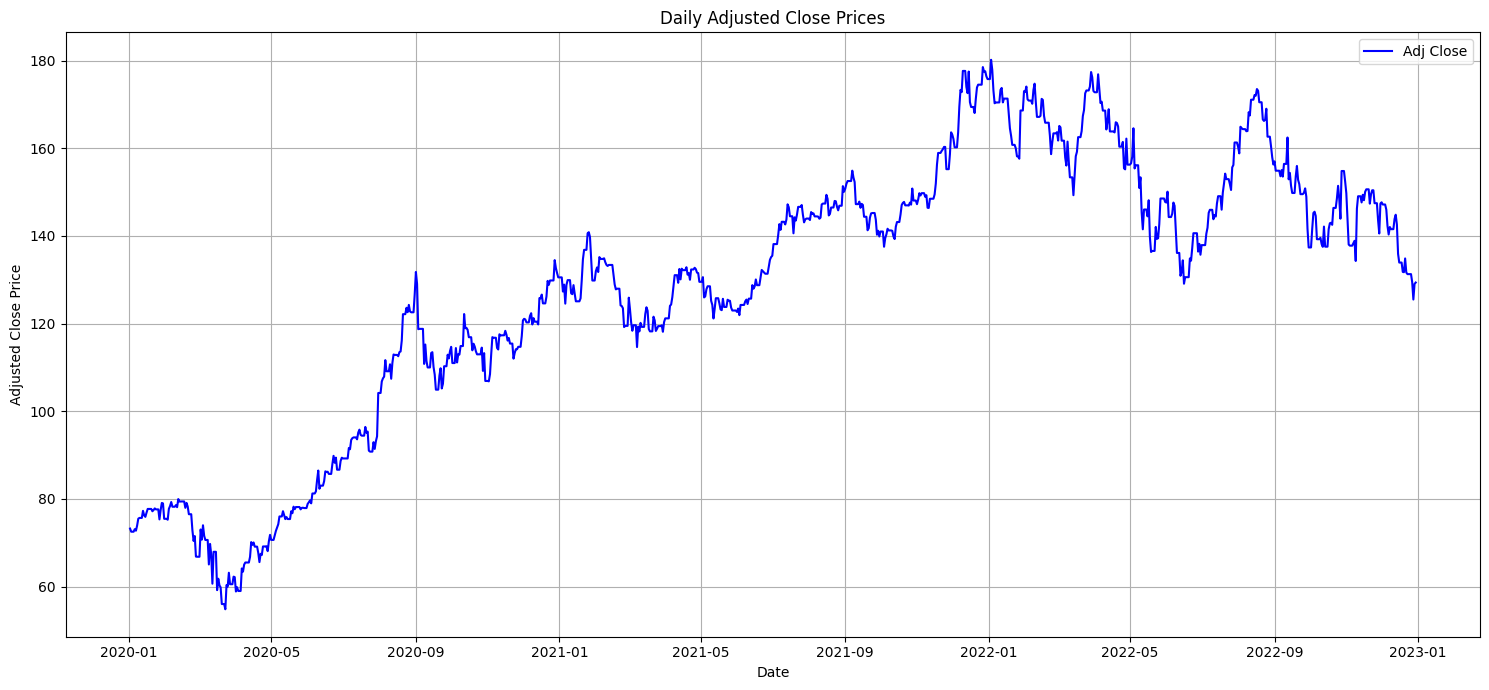

In [8]:
import matplotlib.pyplot as plt

# Plotting daily_data
plt.figure(figsize=(15, 7))
plt.plot(daily_data.index, daily_data.values, label="Adj Close", color='blue')
plt.title("Daily Adjusted Close Prices")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
import numpy as np

def create_sequences(data, sequence_length):
    """
    Create sequences from the data.
    
    Parameters:
    - data: The time series data.
    - sequence_length: Number of past time steps to use to predict the next time step.
    
    Returns:
    - X, y: Features and targets for the model.
    """
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i])  # i-th time step back to (i - sequence_length) time step
        y.append(data[i])  # i-th time step
    return np.array(X), np.array(y)

# Assuming you've scaled the train_data to train_data_scaled
sequence_length = 10  # For example
x_train, y_train = create_sequences(train_data_scaled, sequence_length)
x_test, y_test = create_sequences(test_data_scaled, sequence_length)


In [10]:
x_train

array([[[0.14679872],
        [0.14111731],
        [0.14111731],
        ...,
        [0.16485497],
        [0.16621685],
        [0.16621685]],

       [[0.14111731],
        [0.14111731],
        [0.14111731],
        ...,
        [0.16621685],
        [0.16621685],
        [0.16621685]],

       [[0.14111731],
        [0.14111731],
        [0.14572872],
        ...,
        [0.16621685],
        [0.16621685],
        [0.17911698]],

       ...,

       [[0.72753431],
        [0.72753431],
        [0.72753431],
        ...,
        [0.65213477],
        [0.65213477],
        [0.65213477]],

       [[0.72753431],
        [0.72753431],
        [0.7150997 ],
        ...,
        [0.65213477],
        [0.65213477],
        [0.6958539 ]],

       [[0.72753431],
        [0.7150997 ],
        [0.74440417],
        ...,
        [0.65213477],
        [0.6958539 ],
        [0.6740734 ]]])

In [11]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import GridSearchCV

# 1. Wrap Keras Model for use with Scikit-Learn
def create_model(units=50, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# 2. Define Parameter Grid
param_grid = {
    'units': [128],
    #'dropout_rate': [0.2, 0.3],
    'optimizer': ['adam'],
    'epochs': [100],
    'batch_size': [32]
}

# 3. Use GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid_search.fit(np.array(x_train), np.array(y_train))

# Display the best parameters
print(f"Best Score: {grid_result.best_score_}")
print(f"Best Params: {grid_result.best_params_}")


2023-10-24 16:13:20.634570: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-24 16:13:20.636421: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-24 16:13:20.637718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Best Score: -0.0011039190416442589
Best Params: {'batch_size': 32, 'epochs': 100, 'optimizer': 'adam', 'units': 128}


In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# 1. Define the LSTM Model with Optimal Hyperparameters

model = Sequential()

# First LSTM layer with dropout
model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer with dropout
model.add(LSTM(units=128))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# 2. Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

# 3. Fit the Model to the Training Data
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


2023-10-24 16:33:58.442775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-24 16:33:58.444875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-24 16:33:58.446437: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-10-24 16:33:58.681146: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-24 16:33:58.683458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-24 16:33:58.684972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

20/22 [==========================>...] - ETA: 0s - loss: 0.0429

2023-10-24 16:34:03.354868: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-24 16:34:03.356789: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-24 16:34:03.358932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

22/22 [==============================] - 5s 64ms/step - loss: 0.0399 - val_loss: 0.0020
Epoch 2/100
22/22 [==============================] - 1s 30ms/step - loss: 0.0041 - val_loss: 0.0025
Epoch 3/100
22/22 [==============================] - 1s 29ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 4/100
22/22 [==============================] - 1s 29ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 5/100
22/22 [==============================] - 1s 31ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 6/100
22/22 [==============================] - 1s 29ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 7/100
22/22 [==============================] - 1s 28ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 8/100
22/22 [==============================] - 1s 28ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 9/100
22/22 [==============================] - 1s 29ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 10/100
22/22 [==============================] - 1s 28ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 11/10

In [13]:
# Assuming x_test and y_test are your test data and labels
test_loss = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Loss (MSE): {test_loss}")


7/7 [==============================] - 0s 10ms/step - loss: 0.0016
Test Loss (MSE): 0.001621854375116527


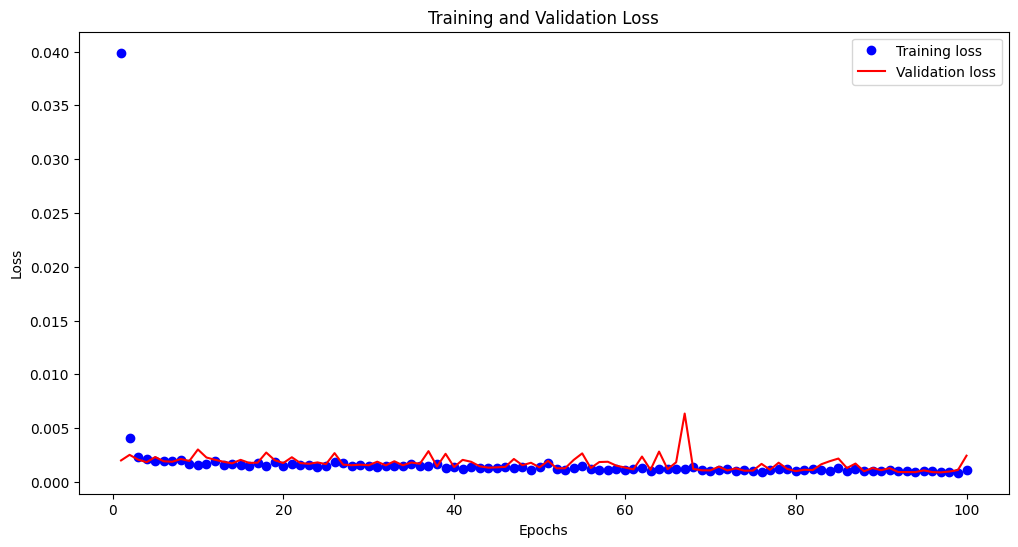

In [14]:
import matplotlib.pyplot as plt

# Extract loss and validation loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


2023-10-24 16:41:02.098709: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-24 16:41:02.100706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-24 16:41:02.102089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 1s 10ms/step


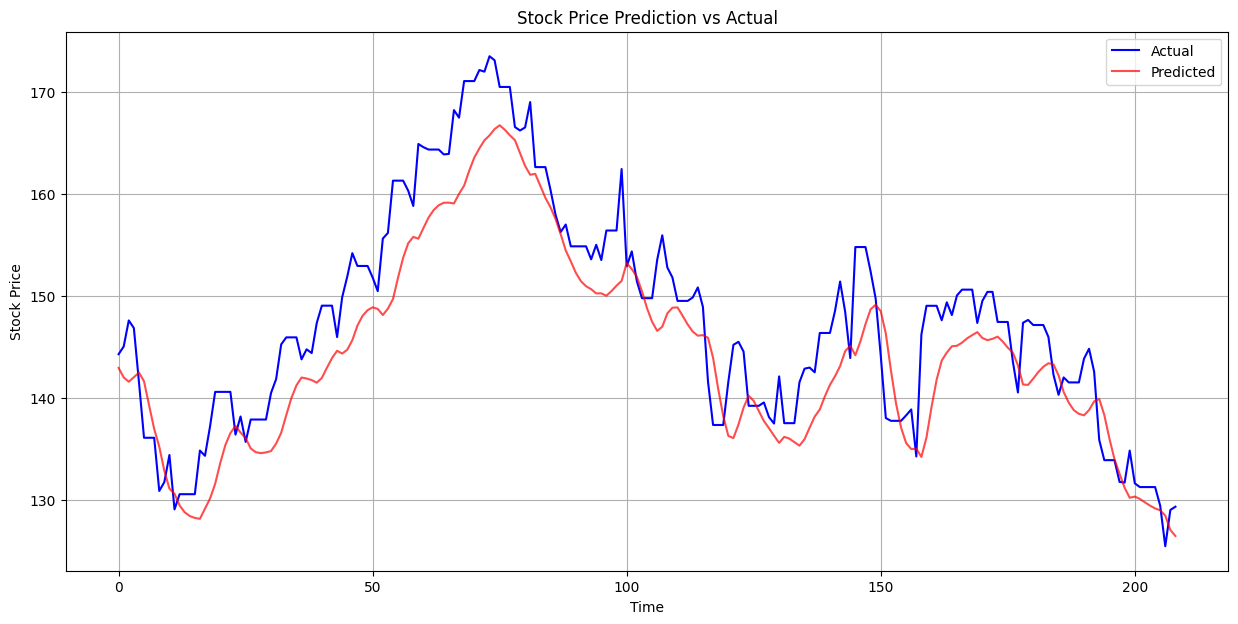

In [15]:
# 1. Predict on the Test Data
predictions_scaled = model.predict(x_test)

# 2. Inverse Scaling
# Assuming you've previously defined and fit a MinMaxScaler named 'scaler'
predictions = scaler.inverse_transform(predictions_scaled)
y_test_original = scaler.inverse_transform(y_test)

# 3. Plot Predictions vs. Actual
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(y_test_original, label="Actual", color='blue')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title("Stock Price Prediction vs Actual")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
def calculate_mape(actual, predicted):
    """Calculate Mean Absolute Percentage Error (MAPE)"""
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape = calculate_mape(y_test_original, predictions)
print(f"MAPE: {mape:.2f}%")


MAPE: 2.83%


In [17]:
from keras.layers import GRU

def create_gru_model(units=128, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    
    # First GRU layer with dropout
    model.add(GRU(units=units, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    
    # Second GRU layer with dropout
    model.add(GRU(units=units))
    model.add(Dropout(dropout_rate))
    
    # Output layer
    model.add(Dense(units=1))
    
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

model_gru = KerasRegressor(build_fn=create_gru_model, epochs=100, batch_size=32, verbose=1)


In [18]:
param_grid_gru = {
    'units': [128],
    'dropout_rate': [0.2],
    'optimizer': ['adam'],
    'epochs': [100],
    'batch_size': [32]
}

grid_search_gru = GridSearchCV(estimator=model_gru, param_grid=param_grid_gru, scoring='neg_mean_squared_error', cv=3)
grid_result_gru = grid_search_gru.fit(np.array(x_train), np.array(y_train))

# Display the best parameters
print(f"GRU Best Score: {grid_result_gru.best_score_}")
print(f"GRU Best Params: {grid_result_gru.best_params_}")


2023-10-24 16:44:54.838378: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-24 16:44:54.840016: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-24 16:44:54.841375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-10-24 16:44:55.042721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-24 16:44:55.044273: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-24 16:44:55.045611: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

18/18 [==============================] - 3s 17ms/step - loss: 0.0847
Epoch 2/100
18/18 [==============================] - 0s 17ms/step - loss: 0.0095
Epoch 3/100
18/18 [==============================] - 0s 16ms/step - loss: 0.0041
Epoch 4/100
18/18 [==============================] - 0s 16ms/step - loss: 0.0034
Epoch 5/100
18/18 [==============================] - 0s 16ms/step - loss: 0.0034
Epoch 6/100
18/18 [==============================] - 0s 16ms/step - loss: 0.0032
Epoch 7/100
18/18 [==============================] - 0s 18ms/step - loss: 0.0033
Epoch 8/100
18/18 [==============================] - 0s 17ms/step - loss: 0.0026
Epoch 9/100
18/18 [==============================] - 0s 20ms/step - loss: 0.0030
Epoch 10/100
18/18 [==============================] - 0s 18ms/step - loss: 0.0027
Epoch 11/100
18/18 [==============================] - 0s 17ms/step - loss: 0.0026
Epoch 12/100
18/18 [==============================] - 0s 17ms/step - loss: 0.0025
Epoch 13/100
18/18 [=================

2023-10-24 16:45:29.096123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-24 16:45:29.098087: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-24 16:45:29.099517: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 1s 5ms/step


2023-10-24 16:45:29.752747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-24 16:45:29.754752: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-24 16:45:29.756274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-10-24 16:45:29.962282: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-24 16:45:29.964167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-24 16:45:29.965476: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

19/19 [==============================] - 4s 19ms/step - loss: 0.0541
Epoch 2/100
19/19 [==============================] - 0s 18ms/step - loss: 0.0049
Epoch 3/100
19/19 [==============================] - 0s 18ms/step - loss: 0.0029
Epoch 4/100
19/19 [==============================] - 0s 18ms/step - loss: 0.0026
Epoch 5/100
19/19 [==============================] - 0s 18ms/step - loss: 0.0023
Epoch 6/100
19/19 [==============================] - 0s 18ms/step - loss: 0.0026
Epoch 7/100
19/19 [==============================] - 0s 18ms/step - loss: 0.0022
Epoch 8/100
19/19 [==============================] - 0s 18ms/step - loss: 0.0027
Epoch 9/100
19/19 [==============================] - 0s 17ms/step - loss: 0.0023
Epoch 10/100
19/19 [==============================] - 0s 18ms/step - loss: 0.0022
Epoch 11/100
19/19 [==============================] - 0s 18ms/step - loss: 0.0025
Epoch 12/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0023
Epoch 13/100
19/19 [=================

2023-10-24 16:46:09.479084: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-24 16:46:09.480629: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-24 16:46:09.482106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - 1s 5ms/step


2023-10-24 16:46:10.136250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-24 16:46:10.137782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-24 16:46:10.139539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-10-24 16:46:10.342005: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-24 16:46:10.343706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-24 16:46:10.345051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

19/19 [==============================] - 4s 19ms/step - loss: 0.0322
Epoch 2/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0024
Epoch 3/100
19/19 [==============================] - 0s 18ms/step - loss: 0.0016
Epoch 4/100
19/19 [==============================] - 0s 18ms/step - loss: 0.0015
Epoch 5/100
19/19 [==============================] - 0s 18ms/step - loss: 0.0016
Epoch 6/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0014
Epoch 7/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0014
Epoch 8/100
19/19 [==============================] - 0s 18ms/step - loss: 0.0013
Epoch 9/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0015
Epoch 10/100
19/19 [==============================] - 0s 18ms/step - loss: 0.0016
Epoch 11/100
19/19 [==============================] - 0s 18ms/step - loss: 0.0018
Epoch 12/100
19/19 [==============================] - 0s 20ms/step - loss: 0.0014
Epoch 13/100
19/19 [=================

2023-10-24 16:46:49.348200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-24 16:46:49.350083: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-24 16:46:49.351363: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - 1s 5ms/step


2023-10-24 16:46:49.980036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-24 16:46:49.981888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-24 16:46:49.984460: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-10-24 16:46:50.186103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-24 16:46:50.187723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-24 16:46:50.188988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

28/28 [==============================] - 4s 18ms/step - loss: 0.0310
Epoch 2/100
28/28 [==============================] - 0s 18ms/step - loss: 0.0031
Epoch 3/100
28/28 [==============================] - 1s 18ms/step - loss: 0.0026
Epoch 4/100
28/28 [==============================] - 0s 17ms/step - loss: 0.0027
Epoch 5/100
28/28 [==============================] - 0s 18ms/step - loss: 0.0024
Epoch 6/100
28/28 [==============================] - 1s 18ms/step - loss: 0.0024
Epoch 7/100
28/28 [==============================] - 1s 18ms/step - loss: 0.0023
Epoch 8/100
28/28 [==============================] - 1s 19ms/step - loss: 0.0025
Epoch 9/100
28/28 [==============================] - 1s 18ms/step - loss: 0.0018
Epoch 10/100
28/28 [==============================] - 0s 18ms/step - loss: 0.0021
Epoch 11/100
28/28 [==============================] - 0s 18ms/step - loss: 0.0019
Epoch 12/100
28/28 [==============================] - 1s 18ms/step - loss: 0.0023
Epoch 13/100
28/28 [=================

In [19]:
# Define and compile the best GRU model
best_gru_model = create_gru_model()
best_gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to the training data
best_gru_model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test data
predictions_scaled_gru = best_gru_model.predict(x_test)

# Inverse the scaling
predictions_gru = scaler.inverse_transform(predictions_scaled_gru)

# Calculate MAPE for GRU
mape_gru = calculate_mape(y_test_original, predictions_gru)
print(f"GRU MAPE: {mape_gru:.2f}%")


2023-10-24 16:49:15.570376: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-24 16:49:15.572131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-24 16:49:15.573390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-10-24 16:49:16.025851: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-24 16:49:16.027819: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-24 16:49:16.029296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

28/28 [==============================] - 4s 19ms/step - loss: 0.0518
Epoch 2/100
28/28 [==============================] - 1s 19ms/step - loss: 0.0038
Epoch 3/100
28/28 [==============================] - 1s 19ms/step - loss: 0.0024
Epoch 4/100
28/28 [==============================] - 1s 18ms/step - loss: 0.0025
Epoch 5/100
28/28 [==============================] - 0s 18ms/step - loss: 0.0022
Epoch 6/100
28/28 [==============================] - 1s 18ms/step - loss: 0.0022
Epoch 7/100
28/28 [==============================] - 0s 18ms/step - loss: 0.0021
Epoch 8/100
28/28 [==============================] - 0s 18ms/step - loss: 0.0025
Epoch 9/100
28/28 [==============================] - 0s 18ms/step - loss: 0.0028
Epoch 10/100
28/28 [==============================] - 0s 18ms/step - loss: 0.0019
Epoch 11/100
28/28 [==============================] - 0s 18ms/step - loss: 0.0023
Epoch 12/100
28/28 [==============================] - 0s 18ms/step - loss: 0.0019
Epoch 13/100
28/28 [=================

2023-10-24 16:50:10.798123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-24 16:50:10.799773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-24 16:50:10.801009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 1s 6ms/step
GRU MAPE: 1.45%


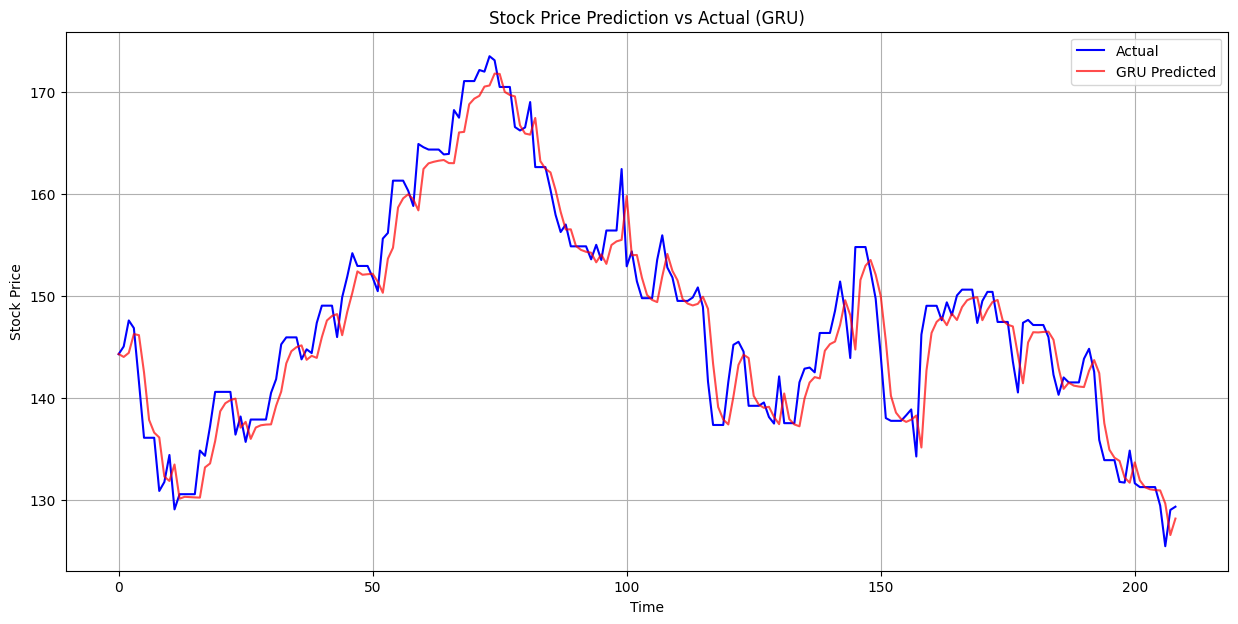

In [20]:
# Visualization of GRU Predictions vs. Actual
plt.figure(figsize=(15, 7))
plt.plot(y_test_original, label="Actual", color='blue')
plt.plot(predictions_gru, label="GRU Predicted", color='red', alpha=0.7)
plt.title("Stock Price Prediction vs Actual (GRU)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# Calculate MAPE for GRU
mape_gru = calculate_mape(y_test_original, predictions_gru)
print(f"GRU MAPE: {mape_gru:.2f}%")
print(f"LSTM MAPE: 2.83%")


GRU MAPE: 1.45%
LSTM MAPE: 2.83%
